# Introduction
Before beginning the data quality report I import the data set and remove all rows which contain weather data outside of the required time period (i.e., the year 2018). Although this could have been completed later, it meant that the dataset was dramatically reduced in size and therefore quicker and easier to work with throughout the DQR.

Station Name: PHOENIX PARK
Station Height: 48 M 
Latitude:53.364  ,Longitude: -6.350
|Feature|Description|Unit|
|---|---|---|
|date|Date and Time| utc|
|rain|Precipitation Amount| mm|	  
|temp|Air Temperature| C|
|wetb|Wet Bulb Temperature|C|
|dewpt|Dew Point Temperature|C|
|vappr|Vapour Pressure|hPa|	                 
|rhum|Relative Humidity|%|
|msl|Mean Sea Level Pressure|hPa|
|ind|Indicator|

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/raw_data/met-2018.csv', parse_dates=[0], low_memory=False)

In [61]:
df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
0,2003-08-16 01:00:00,0,0.0,0,9.2,0,8.9,8.5,11.1,95,1021.9
1,2003-08-16 02:00:00,0,0.0,0,9.0,0,8.7,8.5,11.1,96,1021.7
2,2003-08-16 03:00:00,0,0.0,0,8.2,0,8.0,7.7,10.5,96,1021.2
3,2003-08-16 04:00:00,0,0.0,0,8.4,0,8.1,7.9,10.7,97,1021.2
4,2003-08-16 05:00:00,0,0.0,0,7.7,0,7.5,7.3,10.2,97,1021.1


In [62]:
# drop rows not in 2018
# https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/
df.drop(df[df['date'].dt.year != 2018].index, inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 126047 to 134806
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8760 non-null   datetime64[ns]
 1   ind     8760 non-null   int64         
 2   rain    8760 non-null   object        
 3   ind.1   8760 non-null   int64         
 4   temp    8760 non-null   object        
 5   ind.2   8760 non-null   int64         
 6   wetb    8760 non-null   object        
 7   dewpt   8760 non-null   object        
 8   vappr   8760 non-null   object        
 9   rhum    8760 non-null   object        
 10  msl     8760 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 821.2+ KB


In [64]:
df.to_csv('data/met-2018-data.csv', index=False)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 126047 to 134806
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8760 non-null   datetime64[ns]
 1   ind     8760 non-null   int64         
 2   rain    8760 non-null   object        
 3   ind.1   8760 non-null   int64         
 4   temp    8760 non-null   object        
 5   ind.2   8760 non-null   int64         
 6   wetb    8760 non-null   object        
 7   dewpt   8760 non-null   object        
 8   vappr   8760 non-null   object        
 9   rhum    8760 non-null   object        
 10  msl     8760 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 821.2+ KB


In [66]:
df.reset_index(drop=True)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
0,2018-01-01 00:00:00,0,0.0,0,4.6,0,3.5,1.8,6.9,82,991.0
1,2018-01-01 01:00:00,0,0.1,0,4.7,0,3.6,1.8,7.0,81,991.1
2,2018-01-01 02:00:00,0,0.0,0,4.8,0,3.7,1.9,7.0,81,991.1
3,2018-01-01 03:00:00,0,0.0,0,4.9,0,3.8,2.2,7.2,82,990.7
4,2018-01-01 04:00:00,0,0.0,0,5.3,0,4.1,2.3,7.2,81,990.3
...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31 19:00:00,0,0.0,0,9.9,0,7.9,5.5,9.0,74,1034.9
8756,2018-12-31 20:00:00,0,0.0,0,9.9,0,8.0,5.8,9.2,75,1035.0
8757,2018-12-31 21:00:00,0,0.0,0,9.9,0,7.9,5.7,9.1,75,1035.0
8758,2018-12-31 22:00:00,0,0.0,0,9.9,0,8.0,5.9,9.3,76,1035.1


In [67]:
# check the data types of the columns
df.dtypes

date     datetime64[ns]
ind               int64
rain             object
ind.1             int64
temp             object
ind.2             int64
wetb             object
dewpt            object
vappr            object
rhum             object
msl              object
dtype: object

In [68]:
# print some descriptive statistucs of the df
df.describe(datetime_is_numeric=True).T 

,count,mean,min,25%,50%,75%,max,std
date,8760,2018-07-02 11:30:00,2018-01-01 00:00:00,2018-04-02 05:45:00,2018-07-02 11:30:00,2018-10-01 17:15:00,2018-12-31 23:00:00,NaN
ind,8760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind.1,8760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind.2,8760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
df.nunique()

date     8760
ind         1
rain       44
ind.1       1
temp      305
ind.2       1
wetb      244
dewpt     258
vappr     171
rhum       76
msl       584
dtype: int64

As seen above, the columns ind, ind.1 and ind.2 contain just one unique value. The value of these columns is limited and I will consider dropping them from the dataset going forward.

In [70]:
object_cols = df[['rain','temp','wetb','dewpt','vappr','rhum','msl']]
for col in object_cols:
    print("Minimum value: ", df[col].min())
    print("Maximum value: ", df[col].max())
    print(df[col].describe())

Minimum value:  0.0
Maximum value:  8.6
count     8760
unique      44
top        0.0
freq      7570
Name: rain, dtype: object
Minimum value:  -0.0
Maximum value:  9.9
count     8760
unique     305
top        9.4
freq        87
Name: temp, dtype: object
Minimum value:  -0.0
Maximum value:  9.9
count     8760
unique     244
top        6.9
freq        89
Name: wetb, dtype: object
Minimum value:  -0.0
Maximum value:  9.9
count     8760
unique     258
top        6.3
freq        85
Name: dewpt, dtype: object
Minimum value:  10.0
Maximum value:  9.9
count     8760
unique     171
top        9.1
freq       128
Name: vappr, dtype: object
Minimum value:  24
Maximum value:  99
count     8760
unique      76
top         93
freq       327
Name: rhum, dtype: object
Minimum value:  1000.0
Maximum value:  999.9
count       8760
unique       584
top       1017.9
freq          53
Name: msl, dtype: object


Going to convert all of these columns to the dtype float64.

In [71]:
for col in object_cols:
    df[col] = df[col].astype('float64')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 126047 to 134806
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8760 non-null   datetime64[ns]
 1   ind     8760 non-null   int64         
 2   rain    8760 non-null   float64       
 3   ind.1   8760 non-null   int64         
 4   temp    8760 non-null   float64       
 5   ind.2   8760 non-null   int64         
 6   wetb    8760 non-null   float64       
 7   dewpt   8760 non-null   float64       
 8   vappr   8760 non-null   float64       
 9   rhum    8760 non-null   float64       
 10  msl     8760 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 821.2 KB


In [73]:
# check for duplicate rows
df.duplicated().value_counts()

False    8760
dtype: int64

There are no duplicate rows in the dataframe.

## Descriptive statistics
As all of the columns contain continuous data, there is no need at this point to split the dataframe into categorical and continuous columns for plotting.

In [74]:
# print descriptive stats 

# descriptive column
descriptive_df = df.describe(datetime_is_numeric=True).T 

descriptive_df

,count,mean,min,25%,50%,75%,max,std
date,8760,2018-07-02 11:30:00,2018-01-01 00:00:00,2018-04-02 05:45:00,2018-07-02 11:30:00,2018-10-01 17:15:00,2018-12-31 23:00:00,NaN
ind,8760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rain,8760.0,0.078208,0.0,0.0,0.0,0.0,8.6,0.342674
ind.1,8760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
temp,8760.0,10.449932,-4.5,6.3,10.0,14.5,27.5,5.653197
ind.2,8760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wetb,8760.0,8.503311,-4.6,5.1,8.4,12.0,20.4,4.679926
dewpt,8760.0,6.377043,-9.8,3.1,6.5,9.7,18.3,4.650843
vappr,8760.0,10.031336,2.9,7.6,9.7,12.1,21.0,3.147217
rhum,8760.0,77.064384,24.0,68.0,80.0,88.0,99.0,14.04386


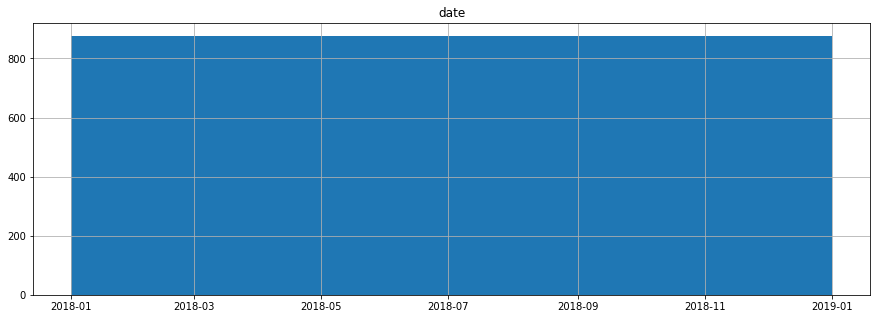

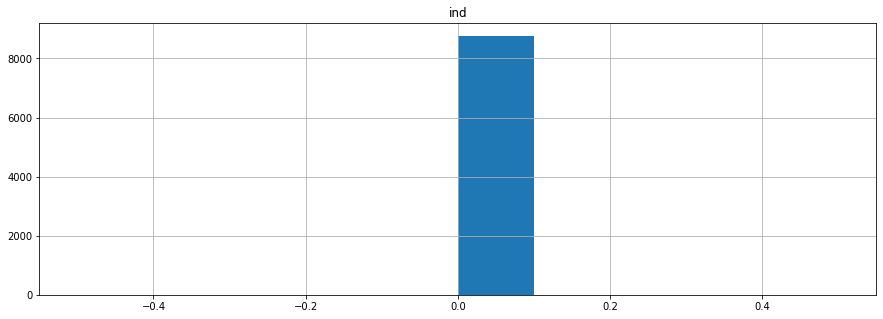

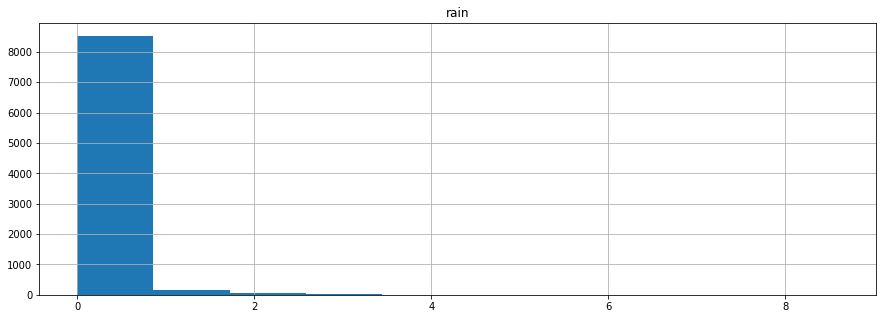

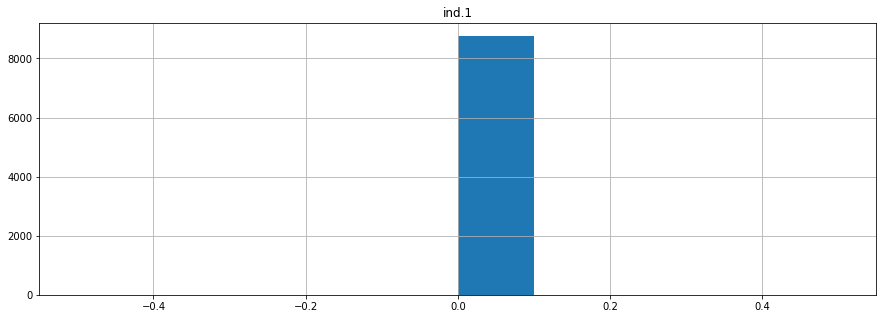

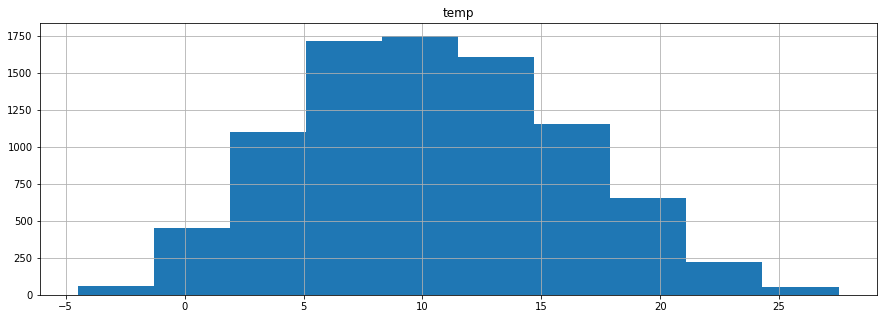

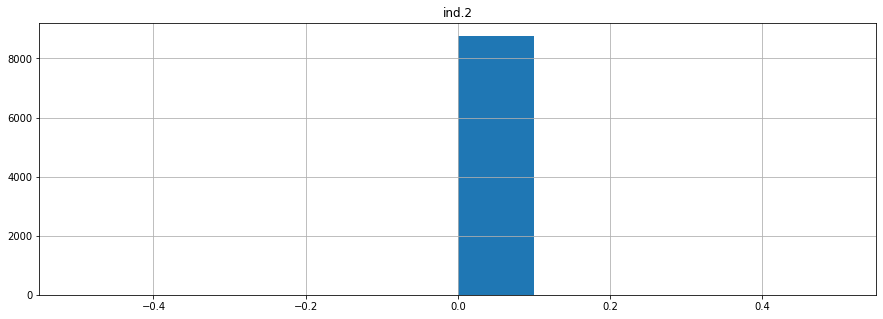

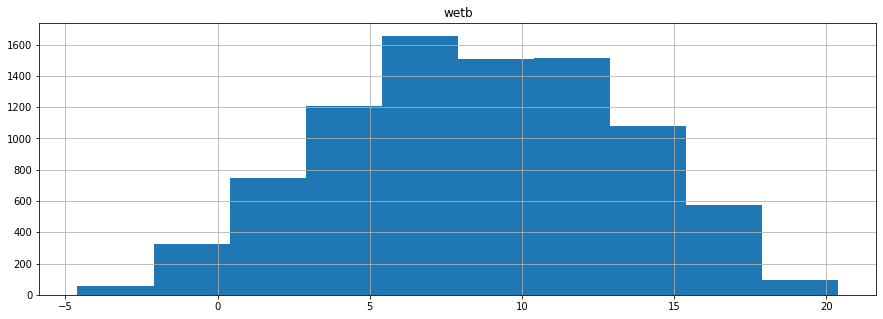

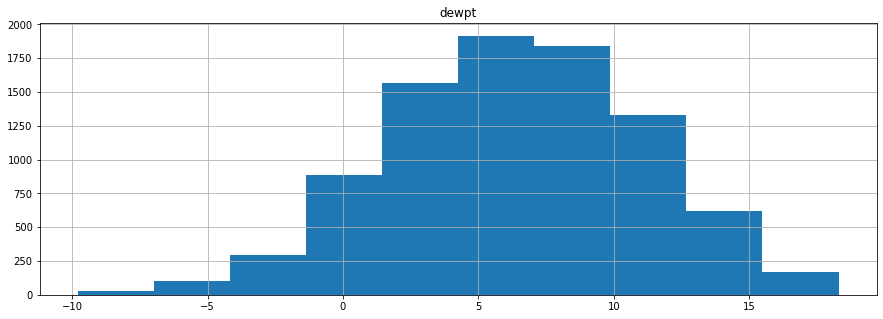

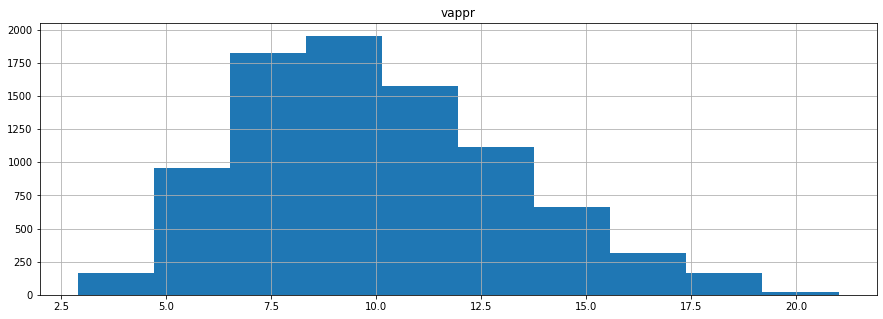

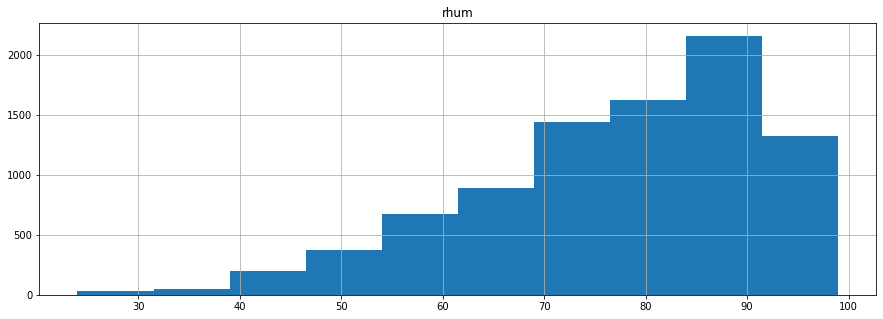

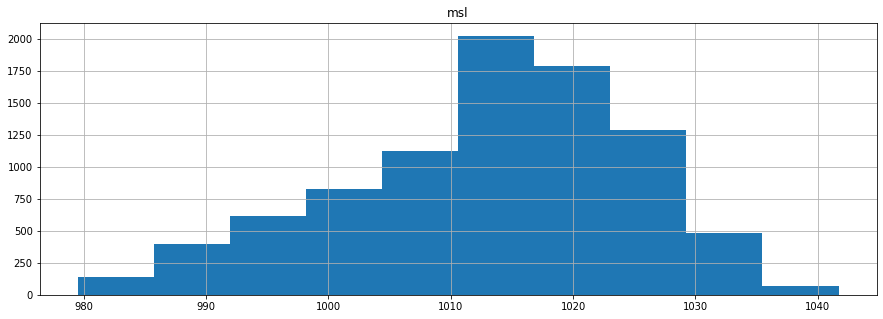

In [75]:
for col in df:
 df[col].hist(figsize=(15,5))
 plt.title(col)
 plt.show()

In [76]:
df.to_csv('data/met-2018-data-cleaned.csv', index=False)

In [77]:
df = df.reset_index(drop=True)

# Data Quality Plan
Initial list of issues identified in the Data Quality Report

|Feature|Data Quality Issue|Action|
|---|---|---|
|date|Values outside of year required (2018)|Drop unnecessary rows, completed in DQR|
|ind|One unique value|Drop column|
|rain|No issue|Keep column|
|ind.1|One unique value|Drop column|
|temp|No issue|Keep column|
|ind.2|One unique value|Drop column|
|wetb|Not useful for model|Drop column|
|dewpt|Not useful for model|Drop column|
|vappr|Not useful for model|Drop column|
|rhum|Not useful for model|Drop column|
|msl|Not useful for model|Drop column|

As per the issues identified in the DQR above, the following columns can be dropped from the dataframe:
* ind
* ind.1
* ind.2
* wetb
* dewpt
* vappr
* rhum
* msl

In [78]:
df.drop(columns=['ind','ind.1','ind.2','wetb','dewpt','vappr','rhum','msl'], inplace=True)

In [79]:
df.head()

,date,rain,temp
0,2018-01-01 00:00:00,0.0,4.6
1,2018-01-01 01:00:00,0.1,4.7
2,2018-01-01 02:00:00,0.0,4.8
3,2018-01-01 03:00:00,0.0,4.9
4,2018-01-01 04:00:00,0.0,5.3


### 1. I will create a boolean column to indicate if it is raining or not.


In [80]:
df.loc[df['rain'] ==0, 'is_raining'] =  '0'
df.loc[df['rain'] > 0, 'is_raining'] = '1'

In [81]:
df.is_raining

0       0
1       1
2       0
3       0
4       0
       ..
8755    0
8756    0
8757    0
8758    0
8759    0
Name: is_raining, Length: 8760, dtype: object

In [82]:
df['is_raining'].describe()

count     8760
unique       2
top          0
freq      7570
Name: is_raining, dtype: object

### 2. Going to create a column 'freezing' which holds boolean values for temperatures below and above 0 degrees celcius.

In [83]:
df.loc[df['temp'] <= 0, 'freezing'] =  '1'
df.loc[df['temp'] > 0, 'freezing'] = '0'

In [84]:
df.freezing

0       0
1       0
2       0
3       0
4       0
       ..
8755    0
8756    0
8757    0
8758    0
8759    0
Name: freezing, Length: 8760, dtype: object

In [85]:
df['freezing'].describe()

count     8760
unique       2
top          0
freq      8577
Name: freezing, dtype: object

### 3. I will create a boolean column named 'heavy_rain' which will indicate heavy rainfall, which may be useful in the prediction model later on.
Rain column has values ranging from 0 to 8.6mm. We can see from above that the 75th percentile value is 0mm. To view the rainfall over the course of the year, I will plot 'rain' against 'date'

<AxesSubplot:xlabel='date', ylabel='rain'>

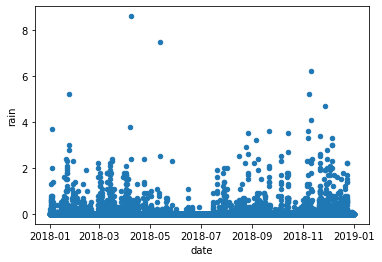

In [86]:
df.plot.scatter(x='date', y='rain', marker='o')

The above scatter plot shows that there was rain throughout the year, with the majority of higher values occuring January-May and September-December. 

In [87]:
# first sort values by rainfall 
df.sort_values(by='rain', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,date,rain,temp,is_raining,freezing
2345,2018-04-08 17:00:00,8.6,10.0,1,0
3161,2018-05-12 17:00:00,7.5,10.7,1,0
7505,2018-11-09 17:00:00,6.2,11.4,1,0
556,2018-01-24 04:00:00,5.2,9.0,1,0
7448,2018-11-07 08:00:00,5.2,8.3,1,0
...,...,...,...,...,...
3276,2018-05-17 12:00:00,0.0,12.8,0,0
3275,2018-05-17 11:00:00,0.0,12.0,0,0
3274,2018-05-17 10:00:00,0.0,11.4,0,0
3273,2018-05-17 09:00:00,0.0,11.5,0,0


We can see that the five highest values for rainfall are in excess of 5mm. To see the higher rainfall values relative to the other values for rainfall, I will plot a box plot.

<AxesSubplot:>

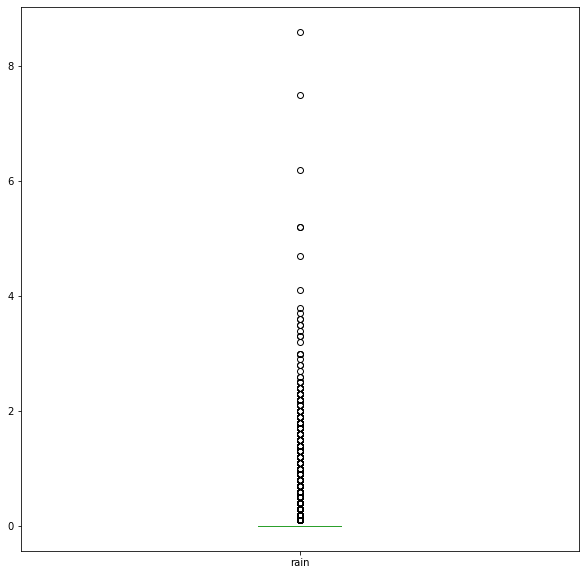

In [88]:
df['rain'].plot(kind='box', figsize=(10,10))

The above boxplot shows that there are a number of values for rain which exceed the 75th percentile value of 0. We will determine the 95th percentile.

In [89]:
rain_perc95 = np.percentile(df['rain'], 95)
rain_perc95

0.5

95th percentile is 0.5mm. I will calculate the 99th percentile.

In [90]:
rain_perc99 = np.percentile(df['rain'], 99)
rain_perc99

1.8

According to this result, just 1% of rows carry values higher than 1.8mm for rainfall. I will view the number of these rows and then view them as a subset of the data to determine if there is a pattern in date.

In [91]:
df[df['rain'] > rain_perc99].shape

(76, 5)

There are 76 occurances of rainfall greater than 1.8mm. Although we previously discovered that the mean rainfall in Dublin in 2018 was 0.08mm, this does not indicate that values above this would be 'heavy' rainfall. 

In [92]:
index_heavy_rain = df[df['rain'] > rain_perc99].index
df_heavy_rain_only = df.iloc[index_heavy_rain]
df_heavy_rain_only

,date,rain,temp,is_raining,freezing
75,2018-01-04 03:00:00,2.0,4.6,1,0
76,2018-01-04 04:00:00,3.7,4.5,1,0
466,2018-01-20 10:00:00,2.4,3.2,1,0
485,2018-01-21 05:00:00,2.0,4.9,1,0
486,2018-01-21 06:00:00,2.3,5.4,1,0
...,...,...,...,...,...
8117,2018-12-05 05:00:00,3.3,7.5,1,0
8118,2018-12-05 06:00:00,2.3,7.9,1,0
8119,2018-12-05 07:00:00,2.0,8.4,1,0
8544,2018-12-23 00:00:00,2.2,7.3,1,0


<AxesSubplot:xlabel='date', ylabel='rain'>

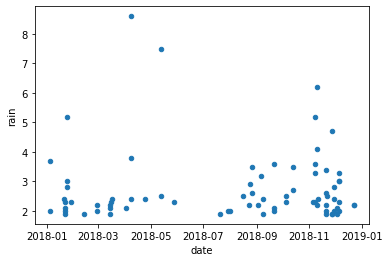

In [93]:
df_heavy_rain_only.plot.scatter(x='date', y='rain', marker='o')

In [95]:
# save cleaned dataframe to new file
df.to_csv('/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/met-2018-data-cleaned.csv', index=False)